# 最急降下法（gradien descent）

<a href="https://colab.research.google.com/github/takunton/ds/blob/main/work/ds_ml/web/lesson10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## １．データ準備

In [33]:
import pandas as pd
df = pd.read_csv('data/sample_data.csv')

In [34]:
df

,space,rent
0,20,13.958824
1,25,11.533805
2,28,14.269547
3,30,18.722680
4,36,19.602674
5,51,16.068166
6,55,23.183599
7,62,22.212595
8,83,29.357010
9,103,37.565129


## ２．データ可視化

In [29]:
import seaborn as sns

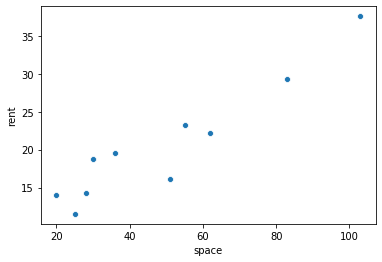

In [35]:
sns.scatterplot(x=df['space'], y=df['rent'], data=df)

## ３．損失関数

In [52]:
%load_ext autoreload
%autoreload 2
import Util

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [53]:
Util.MlUtil.const_func(x=df['space'], y=df['rent'], theta_0=5, theta_1=7)

138703.20244638805

## ４．損失関数可視化

In [54]:
Util.MlUtil.const_func(x=df['space'], y=df['rent'], theta_0=0.5, theta_1=0.5)

60.2073483088192

In [55]:
Util.MlUtil.const_func(x=df['space'], y=df['rent'], theta_0=0, theta_1=0)

482.83384933211573

In [81]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

### 3Dグラフ描画サンプル

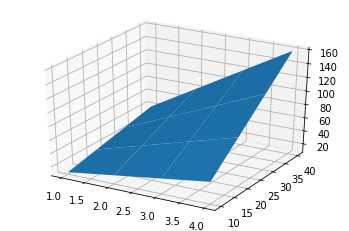

In [106]:
# x, y,z軸のサイズは揃える
X = np.array([[1, 2, 3, 4],
              [1, 2, 3, 4],
              [1, 2, 3, 4],
              [1, 2, 3, 4]])

Y = np.array([[10, 10, 10, 10],
              [20, 20, 20, 20],
              [30, 30, 30, 30],
              [40, 40, 40, 40]])

Z = np.array([[ 10,  20,  30,  40],
              [ 20,  40,  60,  80],
              [ 30,  60,  90, 120],
              [ 40,  80, 120, 160]])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)

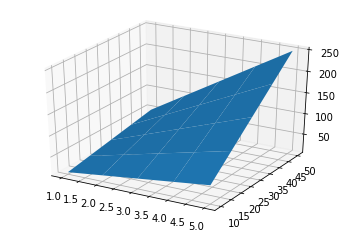

In [110]:
# x, y,z軸のサイズは揃える
X = np.array([[1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5],
              [1, 2, 3, 4, 5]])

Y = np.array([[10, 10, 10, 10, 10],
              [20, 20, 20, 20, 20],
              [30, 30, 30, 30, 30],
              [40, 40, 40, 40, 40],
              [50, 50, 50, 50, 50]])

Z = np.array([[ 10,  20,  30,  40, 50],
              [ 20,  40,  60,  80, 100],
              [ 30,  60,  90, 120, 150],
              [ 40,  80, 120, 160, 200],
              [ 50,  100, 150, 200, 250]])

ax = plt.axes(projection='3d')
ax.plot_surface(X, Y, Z)